Exploring features for the multiple linear regression and random forests model for generating the recommendation/ratings system based on yelp reviews, user and business data. These models are built for specific cities spread across four different states. The four cities are Charlotte (NC), Las Vegas (NV), Phoenix (AZ), Pittsburgh (PA).

#Business data (interested features): spatial location (latitude/longitude), demographic (zip code/population density), review_count (weighted), cuisine type? (not sure), household income index? (not sure, if have time)

#User data (interested features):  average_stars, elite, fans, friends, gender, review_count(weighted)

#Review data (interested features): date, sentimental value(text input to NLTK, http://text-processing.com/demo/sentiment/), polarity, 

#Tip data (interested features):  date, sentimental value(text), polarity

Business based features

Feature#1 (Spatial location: latitude/longitude): Latitude/longitude values are given for each restaurant which would give us the spatial location within each city.

Feature#2 (zip code): In addition to the latitude/longitude values, zip codes are also provided as part of the address. We can see if there is any dependency of the target variable (rating) on the zip codes.

Feature#3 Population density (based on zip code): Population density is obtained from other data sources which shows the population within the zip code area.

Feature#4 review_count: Each restaurant has certain number of reviews within the yelp data. Number of reviews (review_count) shows how active and appealing a particular restaurant is to its customers.

User based features

Feature#5 gender: Gender is derived from a python library based on the name (https://pypi.python.org/pypi/SexMachine). We can see if there are any gender based differences in the reviews and the target variable (star rating) within each city.

Feature#6 user network index: this is derived from the user's active social participation in yelping using the values (fans and friends).

Feature#7: #years of user's elite status: Within the user's data, there is a field called 'elite' which shows the user's participation as an elite in each year.

Feature#8: average_stars (weighted): weight by quality of review.

Reviews based features: 

Feature#9: temporal index: Date is given for each review and we can derive a temporal index by looking into the #reviews within each time period. bin based on day/week, distribution analysis (for example skewness, lookinto ~10 restaurants). variability, 

Feature#10: sentimental value(text input to NLTK)

Feature#11: polarity (from NLTK)

Tip based features

Feature#12: temporal index: Date is given for each review and we can derive a temporal index by looking into the #reviews within each time period. 

Feature#13: sentimental value(text input to NLTK)

Feature#14: polarity (from NLTK)



In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [55]:
def get_starcount_df(rest_df):
    ratings_df = rest_df.groupby('stars')
    star_count = ratings_df.count().name
    percent = []
    for star_entry in star_count:
        percent.append((float(star_entry)/float(star_count.sum()))*100)
    star_count_df = pd.DataFrame({'stars': star_count.index,
                                'star_count': star_count.values,
                                 'percent': percent})
    
    print(star_count_df.to_string(index=False))
    return star_count_df


rest_df = pd.read_json('data_full/Charlotte_Restaurants.json')
test = get_starcount_df(rest_df)

rest_df = pd.read_json('data_full/LasVegas_Restaurants.json')
test = get_starcount_df(rest_df)

rest_df = pd.read_json('data_full/Phoenix_Restaurants.json')
test = get_starcount_df(rest_df)

rest_df = pd.read_json('data_full/Pittsburgh_Restaurants.json')
test = get_starcount_df(rest_df)

#plt.hist(rest_df['stars'])
#plt.xlabel('star rating')
#plt.title('rating distribution for Phoenix')

percent  star_count  stars
 0.848356          16    1.0
 1.855779          35    1.5
 4.135737          78    2.0
10.392365         196    2.5
19.247084         363    3.0
28.738070         542    3.5
25.450689         480    4.0
 8.006363         151    4.5
 1.325557          25    5.0
percent  star_count  stars
 0.450837          21    1.0
 1.953628          91    1.5
 4.937742         230    2.0
11.077716         516    2.5
18.033491         840    3.0
27.608416        1286    3.5
23.872907        1112    4.0
10.412194         485    4.5
 1.653070          77    5.0
percent  star_count  stars
 0.513347          15    1.0
 1.813826          53    1.5
 5.201916         152    2.0
10.677618         312    2.5
18.035592         527    3.0
25.222450         737    3.5
25.427789         743    4.0
11.362081         332    4.5
 1.745380          51    5.0
percent  star_count  stars
 0.071378           1    1.0
 1.213419          17    1.5
 2.855103          40    2.0
 9.421842         132 

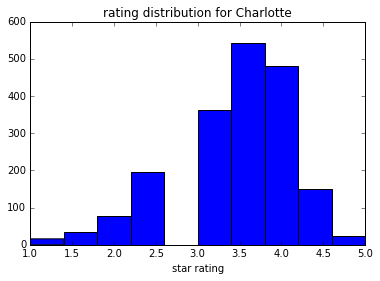

In [5]:
rest_df = pd.read_json('data_full/Charlotte_Restaurants.json')
plt.hist(rest_df['stars'])
plt.xlabel('star rating')
plt.title('rating distribution for Charlotte')

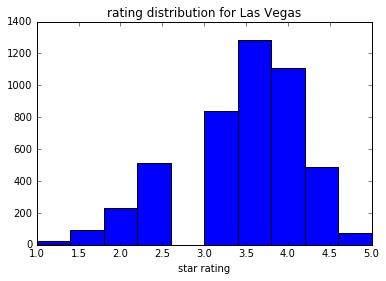

In [6]:
rest_df = pd.read_json('data_full/LasVegas_Restaurants.json')
plt.hist(rest_df['stars'])
plt.xlabel('star rating')
plt.title('rating distribution for Las Vegas')

percent  star_count  stars
 0.071378           1    1.0
 1.213419          17    1.5
 2.855103          40    2.0
 9.421842         132    2.5
16.059957         225    3.0
28.408280         398    3.5
27.123483         380    4.0
12.419700         174    4.5
 2.426838          34    5.0


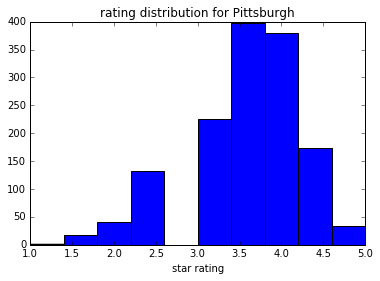

In [54]:
rest_df = pd.read_json('data_full/Pittsburgh_Restaurants.json')
ratings_df = rest_df.groupby('stars')

star_count = ratings_df.count().name
#print(star_count.sum())
#print(ratings_df.count())
#print(star_count.index)


test = get_starcount_df(star_count)

#print(star_count)
plt.hist(rest_df['stars'])
plt.xlabel('star rating')
plt.title('rating distribution for Pittsburgh')

In [9]:
user_df = pd.read_json('data/Phoenix_UserData.json')
print(len(user_df))
user_df.info()
user_df.head(10)

ValueError: Expected object or value

In [4]:
review_df = pd.read_json('data/Phoenix_ReviewData.json')
print(len(review_df))
review_df.info()
review_df.head(5)

ValueError: Expected object or value

In [15]:
tip_df = pd.read_json('data/Phoenix_TipData.json')
print(len(tip_df))
tip_df.info()
tip_df.loc[tip_df['likes'].idxmax()]

54085
<class 'pandas.core.frame.DataFrame'>
Float64Index: 54085 entries, 0.0 to 9999.0
Data columns (total 5 columns):
business_id    54085 non-null object
date           54085 non-null datetime64[ns]
likes          54085 non-null int64
text           54085 non-null object
user_id        54085 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB


business_id    9-cRrGH5WmZKQ_O6LtfSbw
date              2014-09-07 00:00:00
likes                               3
text             Pumpkin beer is here
user_id        4DsUW5yuIkUcZ9Eu7p7EuA
Name: 34900.0, dtype: object

In [ ]:
#extract feature#1 (latitude of restaurant)

def extract_feature1(city_rb_df):
    latitude = city_rb_df['latitude']
    return latitude


In [ ]:
#extract feature#2 (longitude of restaurant)

def extract_feature2(city_rb_df):
    latitude = city_rb_df['longitude']
    return longitude

In [ ]:
#extract feature#3 (zipcode of restaurant)

def extract_feature3(city_rb_df):
    zipcodes= []
    address = city_rb_df['full_address']
    
    for entry in address:
        
    

In [ ]:
import urllib2

url = 'http://www.acme.com/products/3322'
response = urllib2.urlopen(url).read()